In [1]:
from importlib import reload
from copy import deepcopy

import qiskit as qk
from qiskit import IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile, execute
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.circuit.library import MCMT

In [2]:
import tools as t
reload(t)
from tools import counts, probs, job_id

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
sim = qk.Aer.get_backend('qasm_simulator')
manila = provider.get_backend('ibmq_manila')
manila_sim = QasmSimulator.from_backend(manila)

In [4]:
t.list_jobs(manila)

  0 2021-12-19 11:42:09 61bf1a91d6d3bc2d77d2b7f0 DONE
  1 2021-12-18 22:20:41 61be5eb92ac6dd773a4c8000 DONE
  2 2021-12-18 21:58:55 61be599f06351995b9a7a90e DONE
  3 2021-12-18 21:57:29 61be594973db890f4e671990 DONE
  4 2021-12-18 21:34:44 61be53f40e8ecb52391998aa DONE
  5 2021-12-18 21:32:59 61be538b73db89471f671985 DONE
  6 2021-12-18 21:31:56 61be534d0635193098a7a8fc DONE
  7 2021-12-18 21:30:15 61be52e7049a230a26d1990a DONE
  8 2021-12-18 21:26:53 61be521d0e8ecb78e01998a4 DONE
  9 2021-12-18 19:41:28 61be3968e8670011df9fee07 DONE


In [45]:
def error(qc, job_id=None):
    if job_id == None:
        job = execute(qc, backend=manila_sim, shots=20000)
    else:
        job = manila.retrieve_job(job_id)
    
    job_sim = execute(qc, backend=sim, shots=20000)
    
    correct_bits = t.bit_index(list(counts(job_sim).keys()))
    error = np.sum(np.delete(probs(counts(job)), correct_bits))*100
    print(f'prob of bit error is {error:.2f}%')

# Errors in just preparing and measuring

Figure(237.279x144.48)
prob of bit error is 0.77%


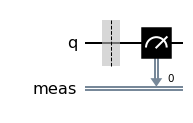

In [102]:
qc = QuantumCircuit(1)
qc.measure_all()
print(qc.draw(output='mpl'))

# job0 = execute(qc, backend=manila, shots=20000)
# print(f'job_id', job0.job_id())

# job_id 61be521d0e8ecb78e01998a4
error(qc, job_id='61be521d0e8ecb78e01998a4')

# Bit errors in Toffoli gate

Figure(417.879x264.88)
prob of bit error is 15.95%


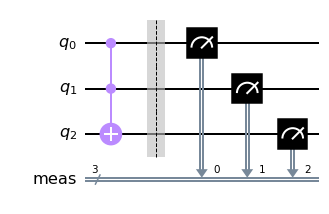

In [103]:
qc = QuantumCircuit(3)
qc.compose(MCMT('cx', 2, 1), inplace=True)
qc.measure_all()
print(qc.draw(output='mpl'))

# job1 = execute(qc, backend=manila, shots=20000)
# print('job id', job1.job_id())

# job_id 61be52e7049a230a26d1990a
error(qc, job_id='61be52e7049a230a26d1990a')

Figure(478.079x325.08)
prob of bit error is 39.51%


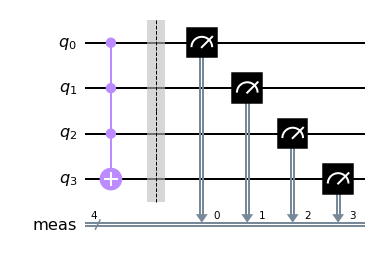

In [118]:
qc = QuantumCircuit(4)
qc.compose(MCMT('cx', 3, 1), inplace=True)
qc.measure_all()
print(qc.draw(output='mpl'))

# job1 = execute(qc, backend=manila, shots=20000)
# print(f'job_id=\'{job1.job_id()}\'')

# job_id='61be5eb92ac6dd773a4c8000'
error(qc, job_id='61be5eb92ac6dd773a4c8000')

Figure(718.879x325.08)
prob of bit error is 43.52%


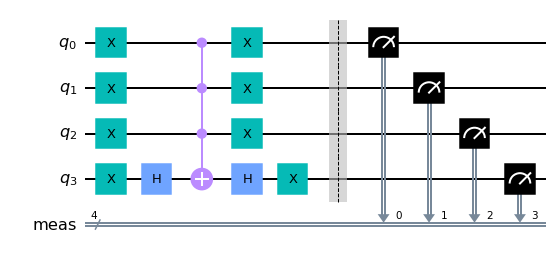

In [104]:
qc = t.oracle_circuit('0000')
qc.measure_all()
print(qc.draw(output='mpl'))

# job1 = execute(qc, backend=manila, shots=20000)
# print('job id', job1.job_id())

# job id 61be534d0635193098a7a8fc
error(qc, job_id='61be534d0635193098a7a8fc')

Figure(718.879x325.08)
prob of bit error is 13.49%


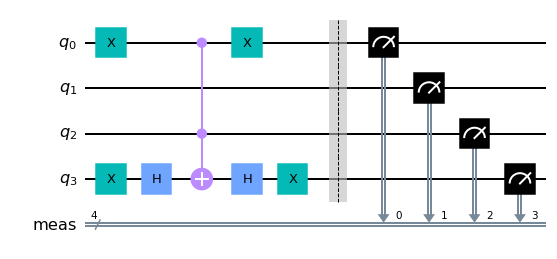

In [105]:
qc = t.oracle_circuit('0.10')
qc.measure_all()
print(qc.draw(output='mpl'))

# job1 = execute(qc, backend=manila, shots=20000)
# print('job id', job1.job_id())

# job id 61be53f40e8ecb52391998aa
error(qc, job_id='61be53f40e8ecb52391998aa')

Figure(658.679x385.28)
job id 61be594973db890f4e671990
prob of bit error is 52.98%


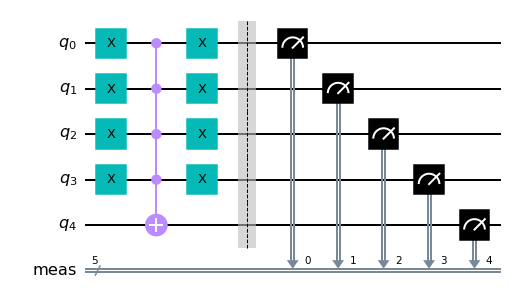

In [107]:
qc = t.oracle_ancilla_circuit('0000')
qc.measure_all()
print(qc.draw(output='mpl'))

# job1 = execute(qc, backend=manila, shots=20000)
# print('job id', job1.job_id())

# 61be594973db890f4e671990
error(qc)

Figure(658.679x385.28)
prob of bit error is 25.88%


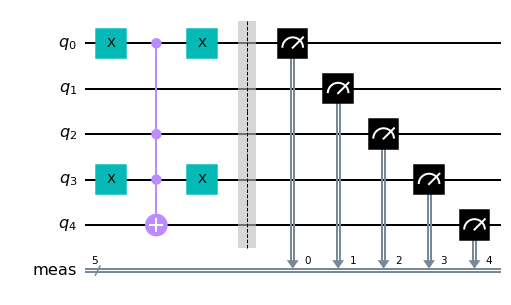

In [110]:
qc = t.oracle_ancilla_circuit('0.10')
qc.measure_all()
print(qc.draw(output='mpl'))

# job1 = execute(qc, backend=manila, shots=20000)
# print(f'job_id=\'{job1.job_id()}\'')

# job_id='61be599f06351995b9a7a90e'
error(qc)

# Bit errors in A operator

Figure(658.679x325.08)
prob of bit error is 12.27%


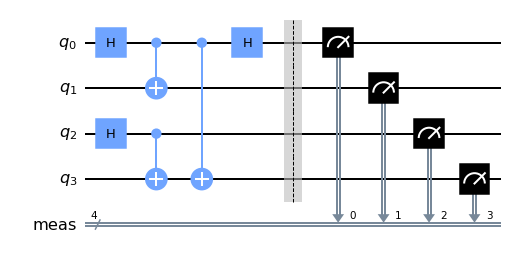

In [111]:
# build A
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0, 1)
A_circ = deepcopy(qc)
B_circ = deepcopy(qc)

qr = QuantumRegister(4, 'q')
qc = QuantumCircuit(qr)
qc.compose(A_circ, qr[:2], inplace=True)
qc.compose(B_circ, qr[-2:], inplace=True)
qc.cnot(0, 3)
qc.h(0)
qc.measure_all()

print(qc.draw(output='mpl'))

# job2 = execute(qc, backend=manila, shots=20000)
# print('job id', job2.job_id())

# job id 61be538b73db89471f671985
error(qc, job_id='61be538b73db89471f671985')